## Introduction

This can be an attempt to look at the Barents Sea M term with the insights of the other notebook (I'm scared).

We can start from the BSO to the BSO + 2 (there will be two gates East and West and see if we can get this thing budgeted with those.

In [1]:
# auto-reload edited modules
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, "/home/mmurakami/crios_backups/an_helper_functions")

# run the script into the current kernel (vars/functions become available)
%run -i "/home/mmurakami/crios_backups/an_helper_functions/load_packages.py"

(50,) (50, 1350, 270)
hf1 (1350, 270)
(1, 1350, 270)
LwetC2d 146614
LwetC 4833023



In [2]:
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter, MaxNLocator
from matplotlib.colors import BoundaryNorm

## What did we learn from the previous notebook?

- be very careful with indexing
- this will be the heat and salt transport timeseries that we did
- try to do this without any normalization by the T and S bin edges because this might be wrong
- start by making sure we use the entire basin and the gates are actually defined correctly based on this

In [3]:
# gates and series
def line_orientation(x, y):
    orientations = np.array([])

    # Iterate through the list of points
    for i in range(1, len(x)):
        if x[i] == x[i - 1] and y[i] != y[i - 1]:
            orientations = np.append(orientations,"V") # vertical line add zonal transp
        elif y[i] == y[i - 1] and x[i] != x[i - 1]:
            orientations = np.append(orientations,"H") # horizontal line add meridional transp
        else:
            orientations = np.append(orientations,"V")  # fill na should be for top of vertical line (ie U)

    # the last one will be the same as the second to last orientation so we can keep consistent sizing
    orientations = np.append(orientations,orientations[-1])

    return orientations
choose_UV_bso = line_orientation(y_bso,x_bso)
choose_UV_sfj = line_orientation(y_sfj,x_sfj)
choose_UV_fjnz = line_orientation(y_fjnz,x_fjnz)
choose_UV_nzru = line_orientation(y_nzru,x_nzru)

choose_UV_bso3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_bso,x_bso):
    choose_UV_bso3d[:,i,j] = np.full(nz,choose_UV_bso[idx])
    idx += 1

choose_UV_sfj3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_sfj,x_sfj):
    choose_UV_sfj3d[:,i,j] = np.full(nz,choose_UV_sfj[idx])
    idx += 1

choose_UV_fjnz3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_fjnz,x_fjnz):
    choose_UV_fjnz3d[:,i,j] = np.full(nz,choose_UV_fjnz[idx])
    idx += 1

choose_UV_nzru3d = np.full((nz,ny,nx),'p')
idx = 0
for i,j in zip(y_nzru,x_nzru):
    choose_UV_nzru3d[:,i,j] = np.full(nz,choose_UV_nzru[idx])
    idx += 1


# change the gate labels for SFJ because this was very wrong
result = choose_UV_sfj.copy()

# print(choose_UV_sfj)

# for i in [3,11,20,28,37]:
for i in [3,20,28,37]:     # these are the indices where we need both the x and y terms for the budget
    result[i] = "B"

# we also need to change manually some of the V terms
for i in [2,10,19,27,36]:
    result[i] = "H"

print()
# print(result)
choose_UV_sfj = result

In [4]:
x_bso[x_bso == 161] = 162

In [5]:
# define another gate directly to the right of the BSO
# where choose_UV_bso is V we subtract 2j and where choose_UV_bso is H we add 2i
x_bsoE = (x_bso.copy())
y_bsoE = (y_bso.copy())

x_bsoE[x_bso == 162] = 164
y_bsoE[y_bso == 558] = 555


In [6]:
myi = 20
# I think we should also define arrays we want to add at -- these are the indices we pull from to do the plotting
x_bso_add = x_bso.copy()
y_bso_add = y_bso.copy()
y_bso_add[myi:] -= 1

x_bsoE_add = x_bsoE.copy()
x_bsoE_add[:myi] -= 1
y_bsoE_add = y_bsoE.copy()

## Redefine mymsk based on the gates (this was wrong)

In [7]:
mymsk[:,84:110] = np.nan

# set new gates and set a new mask between these two lines that we drew
gates[y_bsoE,x_bsoE] = 5
gates[gates ==2] = np.nan
gates[gates==3] = np.nan
gates[gates ==4] = np.nan

(400.0, 600.0)

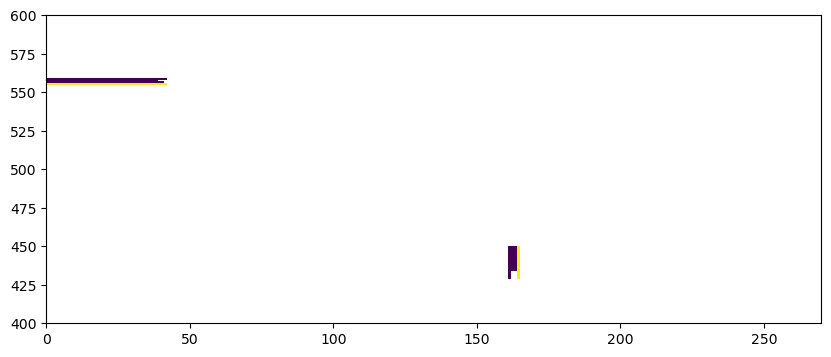

In [8]:
mymsk[:555,:100] = np.nan     # we want to include the "south" index of the gate
mymsk[:,164:] = np.nan        # do not include the East index of the gate
mymsk[555:,41:] = np.nan
plt.pcolormesh(mymsk)
plt.pcolormesh(gates)
plt.ylim(400,600)

(400.0, 600.0)

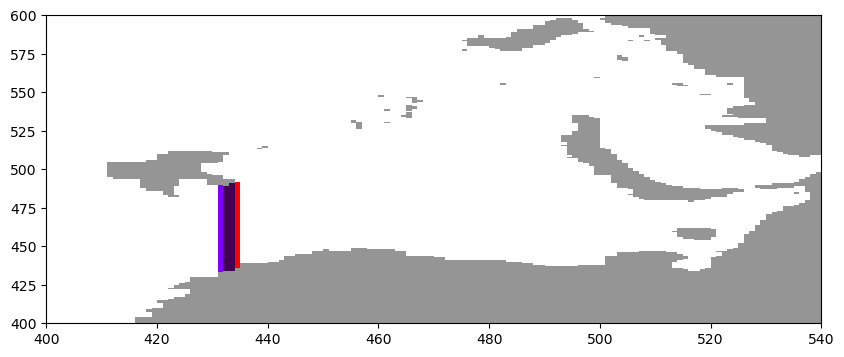

In [9]:
plt.pcolormesh(get_aste_tracer(mymsk,nfx,nfy)[0])
plt.pcolormesh(get_aste_tracer(gates,nfx,nfy)[0],cmap="rainbow")
plt.pcolormesh(get_aste_tracer(landmsk,nfx,nfy)[0],cmap="Greys",vmin=-2,vmax=6)
plt.xlim(400,540)
plt.ylim(400,600)

In [10]:
# # DEBUGGING
# b = get_aste_faces(gates,nfx,nfy)
# b3 = b.f3[0]
# index = 0
# tmp = 2
# for i,j,k in zip(np.where(b3==2)[0],np.where(b3==2)[1],result):
#     b3[i,j] += tmp
    
#     # try to set these here so we at least understand what indices to use
#     if index in [3,11,20,28,37]:
#         b3[i,j] = -10
    
#     tmp += 1
#     index += 1

(1.0, 120.0)

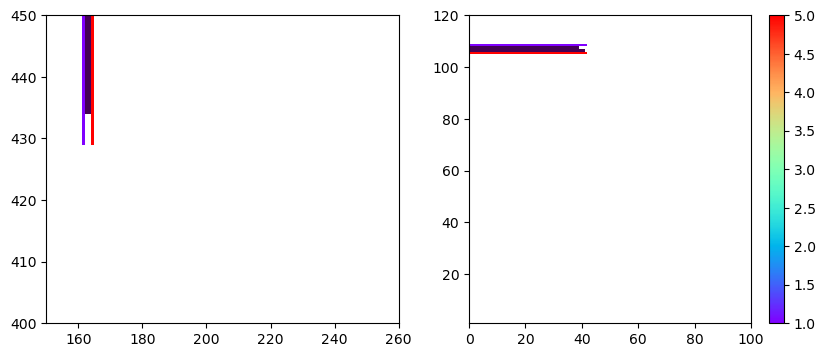

In [11]:
a = get_aste_faces(mymsk,nfx,nfy)
b = get_aste_faces(gates,nfx,nfy)

fig = plt.figure()

ax = plt.subplot(121)
ax.pcolormesh(a.f1[0])
ax.pcolormesh(b.f1[0],cmap='rainbow')
ax.set_xlim(150, 260)
ax.set_ylim(400, 450)

ax = plt.subplot(122)
ax.pcolormesh(a.f3[0])
cb = ax.pcolormesh(b.f3[0], cmap='rainbow')
plt.colorbar(cb)
ax.set_xlim(0, 100)
ax.set_ylim(1, 120)


# Set tick spacing every 1 unit
# ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.yaxis.set_major_locator(MultipleLocator(1))

# Enable grid
# ax.grid(True)

## Load the orientation of the gates as we have done before (3d)

In [12]:
# double check the BSO again to make sure this is the correct way
# we cannot just use chooseUV for sfj because we need both ADVx and ADVy -- can I just do this manually?
# np.where(gates==2)

In [13]:
# choose_UV_bso # H indicates horizontal face (ie face 1) so we use ADVx (based on the lettering) and i (it is a western face)
# H means use the X term
# V means use the Y term

In [14]:
# np.where(gates==1) ## BSO
# np.where(gates==2) ## SFJ
# np.where(gates==3) ## FJNZ
# np.where(gates==4) ## NZRU

## Double check that the indices of the gates are in fact where we want to read from the M term

We do not want to double count the advection from next to the gate within these boxes.

In [15]:
gate_labels = ["BSO", "SFJ", "FJNZ","NZRU"]

In [16]:
## BSO is the only one split between face 1 and face 3 on the "west" and on the "north"
    # Face 1 H: i   and +ADVx
    # Face 3 V: j+1 and -ADVy

## For SFJ - these faces are on the "east" and "north" which we have labeled as H and V
    # these are stored in result which is a copy
    # H: i+1 and -ADVx
    # V: j+1 and -ADVy
    # B: i+1 and -ADVx and j+1 and -ADVy

## For FJNZ - these are on the "east" - also this is the primary gate we are interested in for the export of AW
    # H: i+1 and -ADVx

## For NZRU - these are on the "east" as well
    # H i+1 and -ADVx

(1.0, 120.0)

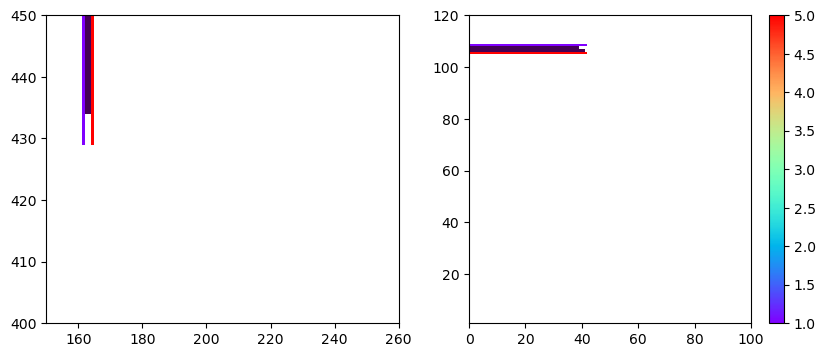

In [17]:
a = get_aste_faces(mymsk,nfx,nfy)
b = get_aste_faces(gates,nfx,nfy)

fig = plt.figure()

ax = plt.subplot(121)
ax.pcolormesh(a.f1[0])
ax.pcolormesh(b.f1[0],cmap='rainbow')
ax.set_xlim(150, 260)
ax.set_ylim(400, 450)

ax = plt.subplot(122)
ax.pcolormesh(a.f3[0])
cb = ax.pcolormesh(b.f3[0], cmap='rainbow')
plt.colorbar(cb)
ax.set_xlim(0, 100)
ax.set_ylim(1, 120)

In [18]:
# I think we just need to check these to see if we're looking at the correct things
## BSO
# look at face1 -- the minimum of the x should be the same as the gate x
# x_bso[x_bso == np.min(np.where(a.f1[0] == 1)[1])-1] = np.min(np.where(a.f1[0] == 1)[1])


In [19]:
# check sfj -- all x_sfj and y_sfj should be at i+1 and j+1 for the gate -- possibly we can check this with the plot
# this is confirmed correct

# fjnz and nzru are also correct indices we want to read from 

In [20]:
# reset the overall gates based on the new x_bso and y_bso -- we can do this with a big key of H vs V vs B

# not sure how we want to get a key -- I think we should do something numeric because that makes sense to me
# we can even set these as negative where we want

# I think perhaps we don't need to make a key because we have the indices

# what do we have and what do we need
    #x_bso, sfj, fjnz, nzru which have the indices that we want to read from
    #choose_UV which have the values we want to read from 

## We should be able to load the regular J terms as we did before, but let's not normalize by T and S

I am scared of doing the normalization yet.

## Start with the salt budget

In [21]:
# create an array of the time steps we want to read
# use ts2dte to get december 2014
# first make an array of filenames
dt_aste = 600
startyr = 2002
endyr = 2019

# all the filenames in the system
fnames = get_fnames(dt_aste,startyr,endyr)

times = {}
times["2016"] = np.arange(1,3,1)

# the filenames we want for 2014
tsstr,datetimes = get_tsteps(times,fnames,dt_aste,startyr,1,1)

t2 = int(tsstr[1])    # this is the averages file that we want to read from when we do budgeting

dt = datetimes[1]-datetimes[0]   # days
dt = dt.total_seconds()
dt

2678400.0

In [22]:
#############################################################################
print("doing salt budget")
# create the salt budget
AB_gT=0
AB_gS=0
file_name = 'budg3d_snap_set2'
meta_budg3d_snap_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_snap_set2["fldList"])
varnames = np.array(["SALTDR"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])


SALTDR = np.full((len(tsstr),nz,ny,nx),np.nan)
for i in range(len(tsstr)):
    thisSALTDR,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[0])
    thisSALTDR = thisSALTDR.reshape(nz,ny,nx)
    SALTDR[i] = thisSALTDR

SALTDR =  (SALTDR[1, :, :,:] - SALTDR[0, :,:, :]) / dt    # PSU.m/s
#print(np.nansum(SALTDR),dt)

tmptend = myparms['rhoconst'] * (SALTDR - AB_gS) * mk3D_mod(RAC,SALTDR)    # kg/m^3 * PSU.m/s * m^2 = g/s
#print(np.nansum(mk3D_mod(RAC,SALTDR)))
#print(np.nansum((SALTDR - AB_gS)))
#print( myparms['rhoconst'])
budgO = {}
budgO['saltfluxes'] = {}
budgI = {}
budgI['saltfluxes'] = {}
budgOI = {}

# ocean

budgO['saltfluxes']['tend'] = tmptend
budgO['salttend'] = np.nansum(tmptend,axis=0)


# read adv and dfe
file_name = "budg3d_hflux_set2"
meta_budg3d_hflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
varnames = np.array(["ADVx_SLT","ADVy_SLT","DFxE_SLT","DFyE_SLT"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
ADVx_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
ADVy_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
DFxE_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
DFyE_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[3])

tmpUo = myparms['rhoconst'] * (ADVx_SLT + DFxE_SLT)
tmpVo = myparms['rhoconst'] * (ADVy_SLT + DFyE_SLT)

# reshape and get the faces
tmpUo = tmpUo.reshape(nz,ny,nx)
tmpVo = tmpVo.reshape(nz,ny,nx)
tmpUo = get_aste_faces(tmpUo,nfx,nfy)              
tmpVo = get_aste_faces(tmpVo,nfx,nfy)

budgO['saltfluxes']['hconv'] = calc_UV_conv_mod(nfx,nfy,tmpUo,tmpVo)
budgO['salthconv'] = calc_UV_conv_mod(nfx,nfy,np.nansum(tmpUo,axis=0),np.nansum(tmpVo,axis=0))


# also do hconv for ADV and DF
tmpUo = get_aste_faces(ADVx_SLT.reshape(nz,ny,nx),nfx,nfy)
tmpVo = get_aste_faces(ADVy_SLT.reshape(nz,ny,nx),nfx,nfy)
budgO['saltfluxes']['ADV_hconv'] = calc_UV_conv_mod(nfx,nfy,tmpUo,tmpVo) * myparms['rhoconst'] #g/s

tmpUo = get_aste_faces(DFxE_SLT.reshape(nz,ny,nx),nfx,nfy)
tmpVo = get_aste_faces(DFyE_SLT.reshape(nz,ny,nx),nfx,nfy)
budgO['saltfluxes']['DF_hconv'] = calc_UV_conv_mod(nfx,nfy,tmpUo,tmpVo) * myparms['rhoconst'] #g/s

# read the vars
file_name = "budg2d_hflux_set1"
meta_budg2d_hflux_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg2d_hflux_set1["fldList"])
varnames = np.array(["ADVxHEFF","ADVyHEFF","DFxEHEFF","DFyEHEFF"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
ADVxHEFF,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
ADVyHEFF,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
DFxEHEFF,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
DFyEHEFF,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[3])
ADVxHEFF = ADVxHEFF.reshape(ny,nx)
ADVyHEFF = ADVxHEFF.reshape(ny,nx)
DFxEHEFF = DFxEHEFF.reshape(ny,nx)
DFyEHEFF = DFyEHEFF.reshape(ny,nx)
    
if myparms['seaice_variable_salinity_flag'] == 0:
    SIsal0 = myparms['SIsal0']

tmpUi = SIsal0 * myparms['rhoi'] * (DFxEHEFF + ADVxHEFF)
tmpVi = SIsal0 * myparms['rhoi'] * (DFyEHEFF + ADVyHEFF)
tmpUi = get_aste_faces(tmpUi,nfx,nfy)              
tmpVi = get_aste_faces(tmpVi,nfx,nfy)

budgI['salthconv'] = calc_UV_conv_mod(nfx,nfy,tmpUi, tmpVi)
budgOI['salthconv'] = (budgO['salthconv'] + budgI['salthconv'])


# read fluxes
file_name = 'budg2d_zflux_set1'
meta_budg2d_zflux_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg2d_zflux_set1["fldList"])
varnames = np.array(["oceSPflx","SFLUX"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
oceSPflx,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
SFLUX,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
oceSPflx = oceSPflx.reshape(ny,nx)
SFLUX = SFLUX.reshape(ny,nx)

# read relax and salt mass
file_name = "budg2d_zflux_set2"
meta_budg2d_zflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg2d_zflux_set2["fldList"])
varnames = np.array(["oceSflux","WSLTMASS","SRELAX"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    if len(irec[0]) > 0:
        recs = np.append(recs, irec[0][0])
oceSflux,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
WSLTMASS,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
SRELAX,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
oceSflux = oceSflux.reshape(ny,nx)
WSLTMASS = WSLTMASS.reshape(ny,nx)
SRELAX = SRELAX.reshape(ny,nx)


# read kpp tend and from 3d zflux
file_name = "budg3d_kpptend_set1"
meta_budg3d_kpptend_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_kpptend_set1["fldList"])
varnames = np.array(["oceSPtnd","KPPg_SLT"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    if len(irec[0]) > 0:
        recs = np.append(recs, irec[0][0])
oceSPtnd,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
KPPg_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
oceSPtnd = oceSPtnd.reshape(nz,ny,nx)
KPPg_SLT = KPPg_SLT.reshape(nz,ny,nx)


# now 3d zfluxes
file_name = "budg3d_zflux_set2"
meta_budg3d_zflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_zflux_set2["fldList"])
varnames = np.array(["ADVr_SLT","DFrE_SLT","DFrI_SLT"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
ADVr_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
DFrE_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
DFrI_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
ADVr_SLT = ADVr_SLT.reshape(nz,ny,nx)
DFrE_SLT = DFrE_SLT.reshape(nz,ny,nx)
DFrI_SLT = DFrI_SLT.reshape(nz,ny,nx)

if myparms["useRFWF"]==0 or myparms['useNLFS']==0:
    print('do nothing')
else:
    oceSflux = 0 * oceSflux

if myparms['useNLFS'] == 0:
    print('do nothing, already read above')
else:
    WSLTMASS=0*WSLTMASS

budgO['saltzconv'] = SFLUX + oceSPflx                  # W/m^2
zconv_top_salt = (SFLUX + oceSPflx) * RAC               # g/s
budgI['saltzconv'] = -budgO['saltzconv'] + SRELAX

if myparms['useNLFS']==0:
    budgO['saltzconv'] = budgO['saltzconv'] - myparms['rhoconst']*WSLTMASS

if myparms['useRFWF']==0 or myparms['useNLFS']==0:
    budgI['saltzconv']=-oceSflux


nr = mygrid['RC'].shape[0]
# break trWtop down into smaller terms
trWtopADV = -(ADVr_SLT)*myparms['rhoconst']           # g/s
trWtopDF = -(DFrE_SLT+DFrI_SLT)*myparms['rhoconst']   # g/s
trWtopKPP = -(KPPg_SLT)*myparms['rhoconst']           # g/s
trWtop = trWtopADV + trWtopDF + trWtopKPP             # g/s 

#print(trWtop.shape)
sptop = mk3D_mod(oceSPflx,oceSPtnd) - np.cumsum(oceSPtnd, axis=0)        # we include this in our zconv_top term
sptop = sptop * RAC3        # g/s

trWtop[1:,:,:] = trWtop[1:,:,:] + sptop[:-1,:,:]
trWtop[0,:,:] = budgO['saltzconv'] * RAC    # g/s top layer is surface flux

trWbot = np.zeros_like(trWtop)
trWbot[:-1,:,:] = trWtop[1:,:,:]
trWbot[-1,:,:] = 0

budgO['saltfluxes']['trWtop'] = trWtop     # g/s
budgO['saltfluxes']['trWbot'] = trWbot     # g/s

budgI['saltfluxes']['trWtop'] = -RAC*0
budgI['saltfluxes']['trWbot'] = budgO['saltfluxes']['trWtop'][0,:,:]  # surface because ice

budgO['saltfluxes']['zconv'] = budgO['saltfluxes']['trWtop'] - budgO['saltfluxes']['trWbot']
budgO['saltzconv'] = RAC * budgO['saltzconv']   # g/s
budgI['saltzconv'] = RAC * budgI['saltzconv']   # g/s
budgOI['saltzconv'] = budgO['saltzconv'] + budgI['saltzconv']

# do vertical convergence for ADV and DF terms
tmpadv = np.full((nz,ny,nx),np.nan)
tmpadv[:-1,:,:] = (trWtopADV[:-1] - trWtopADV[1:])              # for surface thru seafloor

Sconv = budgO['saltfluxes']['ADV_hconv'] + tmpadv
budgO['saltfluxes']['ADV_Sconv'] = Sconv             # g/s, this is the advective arrow of S for a 

# do vertical convergence for ADV and DF terms
tmpdf = np.full((nz,ny,nx),np.nan)
tmpdf[:-1,:,:] = (trWtopDF[:-1] - trWtopDF[1:])              # for surface thru seafloor

dfSconv = budgO['saltfluxes']['DF_hconv'] + tmpdf
budgO['saltfluxes']['DF_Sconv'] = dfSconv             # g/s, this is the diffusive arrow of T for a cell


tmpkpp = np.full((nz,ny,nx),np.nan)
tmpkpp[:-1,:,:] = trWtopKPP[:-1] - trWtopKPP[1:]
budgO['saltfluxes']['KPP_Sconv'] = tmpkpp        # no horizontal component for this

doing salt budget


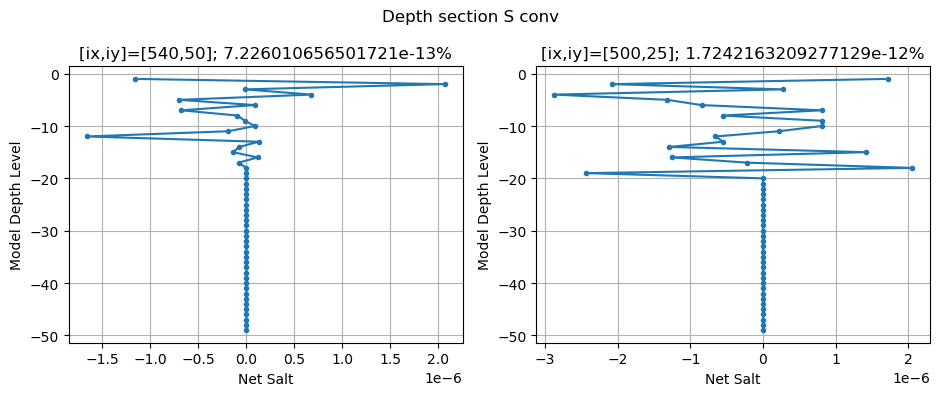

In [23]:
# Data variables (as given in your initial code)
a = budgO['saltfluxes']['tend']
b = budgO['saltfluxes']['ADV_Sconv']
c = budgO['saltfluxes']['DF_Sconv']
d = budgO['saltfluxes']['KPP_Sconv']
e = zconv_top_salt.reshape(1,ny,nx)                 # only at surface, is the surface forcing  ((SFLUX + oceSPflx) * RAC) in g/s
f = sptop                                            # oceSPtnd contribution from the ice

# pick one point from face 3 and one point from face 1
pt = np.array([[10,500,4],       # this is organized as x,y,z
               [220,445,10]])

pt = np.array([[10,500,4],       # this is organized as x,y,z
               [100,600,10]])

# 0 540 50
pt = np.array([[50,540,4],       # this is organized as x,y,z
               [100,600,10]])

y,x = 540,50

pt = np.array([[50,540,0],
               [25,500,0]])      # first is an extreme point, second is a more "normal" or midrange point for 03/2014


# also show the convergence at depth - I will make this a 1 by 2 plot so I can look at things easier

plt.figure(figsize=(9.5, 4))

aa = np.zeros((nz, 2))
plt.suptitle("Depth section S conv")


n = 1
ix, iy, k = pt[n-1]
aa[:, n-1] = a[:, iy, ix] - b[:, iy, ix] - c[:, iy, ix] - d[:, iy, ix]
aa[1:, n-1] += (f[1:,iy,ix] - f[:-1,iy,ix])                                  # from the oceSPflx and oceSPtnd
aa[0, n-1] += f[0,iy,ix]
aa[0, n-1] -= zconv_top_salt[iy, ix]
plt.subplot(1, 2, n)
plt.plot(aa[:, n-1], -np.arange(1, nz+1), '.-')
plt.grid()
plt.xlabel("Net Salt")
plt.ylabel("Model Depth Level")
plt.title(f"[ix,iy]=[{iy},{ix}]; {100 * np.nanmax(np.abs(aa[:, n-1]))/np.nanmax(np.abs(budgO['saltfluxes']['zconv'][:,iy, ix]))}%")

n = 2
ix, iy, k = pt[n-1]
aa[:, n-1] = a[:, iy, ix] - b[:, iy, ix] - c[:, iy, ix] - d[:, iy, ix]
aa[1:, n-1] += (f[1:,iy,ix] - f[:-1,iy,ix])                                  # from the oceSPflx and oceSPtnd
aa[0, n-1] += f[0,iy,ix]
aa[0, n-1] -= zconv_top_salt[iy, ix]

plt.subplot(1, 2, n)
plt.plot(aa[:, n-1], -np.arange(1, nz+1), '.-')
plt.grid()
plt.xlabel("Net Salt")
plt.ylabel("Model Depth Level")
plt.title(f"[ix,iy]=[{iy},{ix}]; {100 * np.nanmax(np.abs(aa[:, n-1]))/np.nanmax(np.abs(budgO['saltfluxes']['zconv'][:,iy, ix]))}%")
    
        
plt.tight_layout()
plt.show()

In [24]:
# load the TS bins
####################################################################################################
print("doing volume")
# get the total volume
# for mass tendency (m^3/s) - time is not yet included in this block
file_name = 'budg2d_snap_set1'

# assuming all files are structured the same
meta_budg2d_snap_set1 = parsemeta(dirIn + file_name + "." + tsstr[0]+ ".meta")
# try to read this with rec
fldlist = np.array(meta_budg2d_snap_set1['fldList'])
varnames = np.array(['ETAN'])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])

# set for all months
vol = np.zeros((len(tsstr),nz, ny, nx))
#print("volume allocation shape",vol.shape)

for t in range(len(tsstr)):
    tmpvol = np.tile(mygrid['DXG'][np.newaxis,:,:],(50,1,1)) * np.tile(mygrid['DYG'][np.newaxis,:,:],(50,1,1)) * DRF3d

    vol[t,:,:,:] = tmpvol * np.tile(mymsk, (nz, 1, 1))
#######
print("doing TS binning")
# read theta and salt averages from the t2 timestep (average)
file_name = "state_3d_set1"
meta_budg3d_kpptend_set1 = parsemeta(dirState + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_kpptend_set1["fldList"])
varnames = np.array(["THETA","SALT"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
THETA,its,meta = rdmds(os.path.join(dirState, file_name),t2,returnmeta=True,rec=recs[0])
SALT,its,meta = rdmds(os.path.join(dirState, file_name),t2,returnmeta=True,rec=recs[1])

THETA = THETA.reshape(nz,ny,nx) * np.tile(mymsk[np.newaxis,:,:],(nz,1,1))
SALT = SALT.reshape(nz,ny,nx) * np.tile(mymsk[np.newaxis,:,:],(nz,1,1))

# create the bins of TS data
n_bins = 112

T_min, T_max = -2.0, 15.0
S_min, S_max = 28.0, 37.0

# edges and centers
binsTH_edges   = np.linspace(T_min, T_max, n_bins + 1)
binsSLT_edges  = np.linspace(S_min, S_max, n_bins + 1)
binsTH_centers = 0.5 * (binsTH_edges[:-1]  + binsTH_edges[1:])
binsSLT_centers= 0.5 * (binsSLT_edges[:-1] + binsSLT_edges[1:])

nT = nS = n_bins

# 2D bin grids
Tbin,     Sbin     = np.meshgrid(binsTH_edges,  binsSLT_edges)
Tbincent, Sbincent = np.meshgrid(binsTH_centers, binsSLT_centers)

# bin widths and reshaped versions (match downstream shape)
binwidthT = np.diff(binsTH_edges)
binwidthS = np.diff(binsSLT_edges)
dT, dS = np.meshgrid(binwidthT, binwidthS)
dT = dT.reshape(n_bins, n_bins, 1)
dS = dS.reshape(n_bins, n_bins, 1)

# bin theta and salt
binned_theta = bin_array(THETA, binsTH_edges).astype(float)
binned_theta[binned_theta == nT] = np.nan  # handle right-edge assignment
binned_theta[np.isnan(binned_theta)] = 0

binned_salinity = bin_array(SALT, binsSLT_edges).astype(float)
binned_salinity[binned_salinity == nS] = np.nan
binned_salinity[np.isnan(binned_salinity)] = 0

doing volume
doing TS binning


In [25]:
# PASTE THE KEY AGAIN HERE IN CASE I FORGET
## BSO is the only one split between face 1 and face 3 on the "west" and on the "north"
    # Face 1 H: i   and +ADVx
    # Face 3 V: j+1 and -ADVy

## For SFJ - these faces are on the "east" and "north" which we have labeled as H and V
    # these are stored in result which is a copy
    # H: i+1 and -ADVx
    # V: j+1 and -ADVy
    # B: i+1 and -ADVx and j+1 and -ADVy

## For FJNZ - these are on the "east" - also this is the primary gate we are interested in for the export of AW
    # H: i+1 and -ADVx

## For NZRU - these are on the "east" as well
    # H i+1 and -ADVx

In [26]:
# try to grab just the gateway terms (these are advection * rhoconst)

# I think it would make the most sense to do this as a dictionary for each of the gates
# each key in the dictionary will be the advective contribution of that gate
ADV_gates = {}

# reshape the ADVx terms
tmpADVx_SLT = ADVx_SLT.reshape(nz,ny,nx)
tmpADVy_SLT = ADVy_SLT.reshape(nz,ny,nx)

# WRITE THIS AGAIN SO I REMEMBER, WHEN H WE WANT TO CHOOSE THE X TERM WHEN V WE WANT TO CHOOSE THE Y TERM

# do for the BSO based on the y,x,and choose_UV
ADV_BSO = np.zeros((nz,ny,nx))
for j,i,direction in zip(y_bso,x_bso,choose_UV_bso):
    # if the direction is V (face3), we select the ADV from the indices of y_bso and x_bso but we want to put this at y_bso-1
    # this would be the face we tag for the T and S bins
    if direction == "H":
        ADV_BSO[:,j,i] += tmpADVx_SLT[:,j,i] * myparms['rhoconst']
    elif direction == "V":
        ADV_BSO[:,j-1,i] -= tmpADVy_SLT[:,j,i] * myparms['rhoconst']  # assuming we selected from the correct index of bso which I think we did
ADV_gates["BSO"] = ADV_BSO


# do for the second BSO gate -- will effectively be the same except this is East so we need to index differently
# do for the BSO based on the y,x,and choose_UV
ADV_BSOE = np.zeros((nz,ny,nx))
for j,i,direction in zip(y_bsoE,x_bsoE,choose_UV_bso):
    # if the direction is V (face3), we select the ADV from the indices of y_bso and x_bso but we want to put this at y_bso-1
    # this would be the face we tag for the T and S bins
    if direction == "H":
        ADV_BSOE[:,j,i-1] -= tmpADVx_SLT[:,j,i] * myparms['rhoconst']
    elif direction == "V":
        ADV_BSOE[:,j,i] += tmpADVy_SLT[:,j,i] * myparms['rhoconst']  # assuming we selected from the correct index of bso which I think we did
ADV_gates["BSOE"] = ADV_BSOE

## Get the original budget in TS space

In [27]:
# plt.pcolormesh(get_aste_tracer(mymsk,nfx,nfy)[0])

In [28]:
print("doing JtermsS")
dstart = 0
dterm = 50
# initialize the J vectors for salt
JtermsS = np.zeros((5,nS,nT))

# get the values
aS = budgO['saltfluxes']['tend']
bS = budgO['saltfluxes']['ADV_Sconv']
cS = budgO['saltfluxes']['DF_Sconv']
dS = budgO['saltfluxes']['KPP_Sconv']
eS = zconv_top_salt.reshape(1,ny,nx)
fS = sptop

# do the same normalization everywhere so that we have it
binwidthTconst = np.nanmax(binwidthT)
binwidthSconst = np.nanmax(binwidthS)
norm = (binwidthTconst * binwidthSconst * myparms['rhoconst'])

points = np.argwhere(mymsk == 1)
ys = points[:,0]
xs = points[:,1]
for i,j in zip(ys,xs):

    # loop through the depths and add
    for k in range (dstart,dterm-1):
        iTpt = int(binned_theta[k,i,j])
        iSpt = int(binned_salinity[k,i,j])
    
        # save the J terms for here for the single point   
        JtendS = (aS[k,i,j]) / norm * 1e-6             # Sv
        JADVS = (bS[k,i,j]) / norm * 1e-6              # Sv
        JDFS = (cS[k,i,j]) / norm * 1e-6               # Sv
        JKPPS = (dS[k,i,j]) / norm * 1e-6              # Sv

        # surface term will be unique
        if k == 0:
            JsurfS = (eS[k,i,j] - fS[k+1,i,j]) / norm * 1e-6  # Sv
        else:
            JsurfS = -(fS[k,i,j] - fS[k-1,i,j]) / norm * 1e-6  # Sv

        # set these in meshes so we can plot
        c = 0
        for valS in (np.array([JtendS,JADVS,JDFS,JKPPS,JsurfS])):
            #print(valT)
            JtermsS[c,iSpt,iTpt] += valS
            c += 1

# we will not print all terms here -- overkill
print("total residual",np.nansum(JtermsS[0] - JtermsS[1] - JtermsS[2] - JtermsS[3] - JtermsS[4]))#,"Sv/degC")

doing JtermsS
total residual -3.018073947422939e-11


(60.0, 105.0)

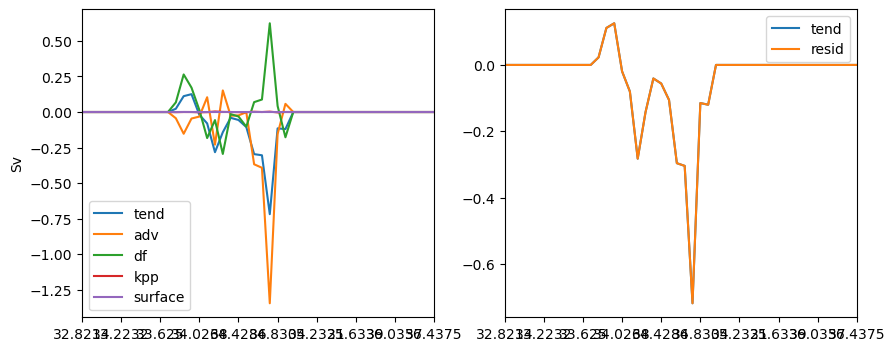

In [29]:

# formatter: map integer index -> binsSLT_edges[index]
def idx_to_bins_formatter(edges):
    def _fmt(x, pos):
        i = int(round(x))
        if 0 <= i < len(edges):
            return f"{edges[i]:g}"
        return ""
    return FuncFormatter(_fmt)

labels = np.array(["tend","adv","df","kpp","surface"])
fig = plt.figure()

# --- left subplot ---
ax = plt.subplot(121)
resid = np.zeros((nS))
for i in range(5):
    plotthis = np.nansum(JtermsS[i], axis=1)  # length nS (indices 0..nS-1)
    if i > 0:
        resid += plotthis
    ax.plot(plotthis, label=labels[i])

ax.set_ylabel("Sv")
ax.set_xlim(-0.5, nS - 0.5)                     # keep ticks aligned to integer indices
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(idx_to_bins_formatter(binsSLT_edges))
ax.legend(loc="best")
ax.set_xlim(60,105)

# --- right subplot ---
ax2 = plt.subplot(122)
ax2.plot(np.nansum(JtermsS[0], axis=1), label="tend")
ax2.plot(resid, label="resid")
ax2.set_xlim(-0.5, nS - 0.5)
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_formatter(idx_to_bins_formatter(binsSLT_edges))
ax2.legend(loc="best")
ax2.set_xlim(60,105)

In [30]:
# get the J terms from the gate(s) to compare it 

# the terms in ADV_gates at this moment are in g/s

In [31]:
# I think we should do each of the gates separately because this doesn't make sense otherwise as we need x-1 and y+1 for any
# recall the key again 

# PASTE THE KEY AGAIN HERE IN CASE I FORGET
## BSO is the only one split between face 1 and face 3 on the "west" and on the "north"
    # Face 1 H: i   and +ADVx
    # Face 3 V: j+1 and -ADVy

## For SFJ - these faces are on the "east" and "north" which we have labeled as H and V
    # these are stored in result which is a copy
    # H: i+1 and -ADVx
    # V: j+1 and -ADVy
    # B: i+1 and -ADVx and j+1 and -ADVy

## For FJNZ - these are on the "east" - also this is the primary gate we are interested in for the export of AW
    # H: i+1 and -ADVx

## For NZRU - these are on the "east" as well
    # H i+1 and -ADVx

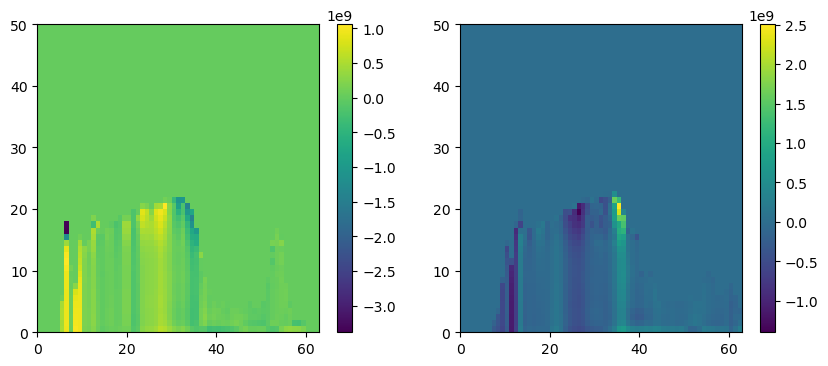

In [37]:
# check the ADV gates again so I remember which index to grab from
fig = plt.figure()

ax = plt.subplot(121)
mybso = ADV_gates["BSO"][:,y_bso,x_bso]
f3start = np.where(choose_UV_bso == "V")[0][0]
mybso[:,f3start:] = ADV_gates["BSO"][:,y_bso[f3start:]-1,x_bso[f3start:]]
cb = ax.pcolormesh(mybso)
plt.colorbar(cb)

ax = plt.subplot(122)
mybso = ADV_gates["BSOE"][:,y_bsoE,x_bsoE-1]
f3start = np.where(choose_UV_bso == "V")[0][0]
mybso[:,f3start:] = ADV_gates["BSOE"][:,y_bsoE[f3start:],x_bsoE[f3start:]]
cb = ax.pcolormesh(mybso)
plt.colorbar(cb)

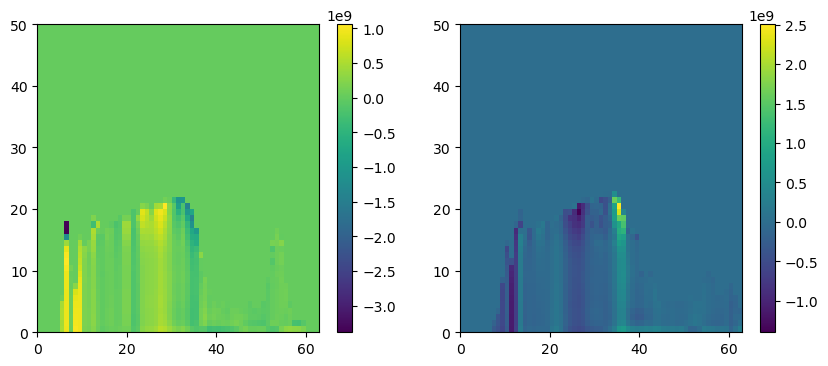

In [39]:
# check the ADV gates again so I remember which index to grab from
fig = plt.figure()

ax = plt.subplot(121)
mybso = ADV_gates["BSO"][:,y_bso_add,x_bso_add]
cb = ax.pcolormesh(mybso)
plt.colorbar(cb)

ax = plt.subplot(122)
mybso = ADV_gates["BSOE"][:,y_bsoE_add,x_bsoE_add]
cb = ax.pcolormesh(mybso)
plt.colorbar(cb)

In [40]:
hfC1 = mygrid['hFacC']
hfC1[hfC1<1] = 1
binned_theta *= hfC1
binned_salinity *= hfC1

J_gates = np.zeros((2,nS,nT))

In [35]:
# start from here and expand

# this is where we try to put the salt terms into a TS mesh
# we need to go through the ADV points in each gate and add them to the TS bin at that point
binwidthTconst = np.nanmax(binwidthT)
binwidthSconst = np.nanmax(binwidthS)
norm = (binwidthTconst * binwidthSconst * myparms['rhoconst'])

#########################################################################################################################
f3start = np.where(choose_UV_bso == "V")[0][0]   # we need to define this index for the start of face 3 for the BSO

# when we need the x terms
for j,i,direction in zip(y_bso[:f3start],x_bso[:f3start],choose_UV_bso[:f3start]):
    # based on the direction, grab from ADV_gates at the correct index
    col = ADV_gates["BSO"][:,j,i]

    nzc = len(binned_theta[:,j,i][~np.isnan(binned_theta[:,j,i])])
    for kc in range(nzc):
        # get the T and S bin for that item
        iTpt = int(binned_theta[kc,j,i])
        iSpt = int(binned_salinity[kc,j,i])
        J_gates[0,iSpt,iTpt] += (col[kc]) / norm

# when we need the y terms
for j,i,direction in zip(y_bso[f3start:],x_bso[f3start:],choose_UV_bso[f3start:]):
    # based on the direction, grab from ADV_gates at the correct index
    col = ADV_gates["BSO"][:,j-1,i]

    nzc = len(binned_theta[:,j-1,i][~np.isnan(binned_theta[:,j-1,i])])
    for kc in range(nzc):
        # get the T and S bin for that item
        iTpt = int(binned_theta[kc,j-1,i])
        iSpt = int(binned_salinity[kc,j-1,i])
        J_gates[0,iSpt,iTpt] += (col[kc]) / norm   # 

#########################################################################################################################
# do this for BSOE
f3start = np.where(choose_UV_bso == "V")[0][0]   # we need to define this index for the start of face 3 for the BSO

# for the east gate"
for j,i,direction in zip(y_bsoE[:f3start],x_bsoE[:f3start],choose_UV_bso[:f3start]):
    # based on the direction, grab from ADV_gates at the correct index
    col = ADV_gates["BSOE"][:,j,i-1]

    nzc = len(binned_theta[:,j,i-1][~np.isnan(binned_theta[:,j,i-1])])
    for kc in range(nzc):
        # get the T and S bin for that item
        iTpt = int(binned_theta[kc,j,i-1])
        iSpt = int(binned_salinity[kc,j,i-1])
        J_gates[1,iSpt,iTpt] += (col[kc]) / norm

# for the "south" gate
for j,i,direction in zip(y_bsoE[f3start:],x_bsoE[f3start:],choose_UV_bso[f3start:]):
    # based on the direction, grab from ADV_gates at the correct index
    col = ADV_gates["BSOE"][:,j,i]

    nzc = len(binned_theta[:,j,i][~np.isnan(binned_theta[:,j,i])])
    for kc in range(nzc):
        # get the T and S bin for that item
        iTpt = int(binned_theta[kc,j,i])
        iSpt = int(binned_salinity[kc,j,i])
        J_gates[1,iSpt,iTpt] += (col[kc]) / norm   # 


#############################################################################################################################
J_gates *= 1e-6

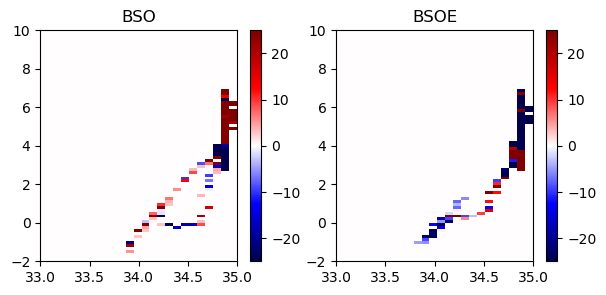

In [36]:
fig = plt.figure(figsize=(7,3))

ax = plt.subplot(121)
cb=ax.pcolormesh(Sbin,Tbin,J_gates[0],cmap='seismic',vmin=-25,vmax=25)
ax.set_title("BSO")
ax.set_xlim(33,35)
ax.set_ylim(-2,10)
plt.colorbar(cb)

ax = plt.subplot(122)
cb=ax.pcolormesh(Sbin,Tbin,J_gates[1],cmap='seismic',vmin=-25,vmax=25)
ax.set_title("BSOE")
ax.set_xlim(33,35)
ax.set_ylim(-2,10)
plt.colorbar(cb)


In [42]:
# start from here and expand

# this is where we try to put the salt terms into a TS mesh
# we need to go through the ADV points in each gate and add them to the TS bin at that point
binwidthTconst = np.nanmax(binwidthT)
binwidthSconst = np.nanmax(binwidthS)
norm = (binwidthTconst * binwidthSconst * myparms['rhoconst'])

#########################################################################################################################

# when we need the x terms
for j,i,direction in zip(y_bso_add,x_bso_add,choose_UV_bso):
    # based on the direction, grab from ADV_gates at the correct index
    col = ADV_gates["BSO"][:,j,i]

    nzc = len(binned_theta[:,j,i][~np.isnan(binned_theta[:,j,i])])
    for kc in range(nzc):
        # get the T and S bin for that item
        iTpt = int(binned_theta[kc,j,i])
        iSpt = int(binned_salinity[kc,j,i])
        J_gates[0,iSpt,iTpt] += (col[kc]) / norm

#########################################################################################################################
# do this for BSOE
f3start = np.where(choose_UV_bso == "V")[0][0]   # we need to define this index for the start of face 3 for the BSO

# for the east gate"
for j,i,direction in zip(y_bsoE_add,x_bsoE_add,choose_UV_bso):
    # based on the direction, grab from ADV_gates at the correct index
    col = ADV_gates["BSOE"][:,j,i]

    nzc = len(binned_theta[:,j,i][~np.isnan(binned_theta[:,j,i])])
    for kc in range(nzc):
        # get the T and S bin for that item
        iTpt = int(binned_theta[kc,j,i])
        iSpt = int(binned_salinity[kc,j,i])
        J_gates[1,iSpt,iTpt] += (col[kc]) / norm

#############################################################################################################################
J_gates *= 1e-6

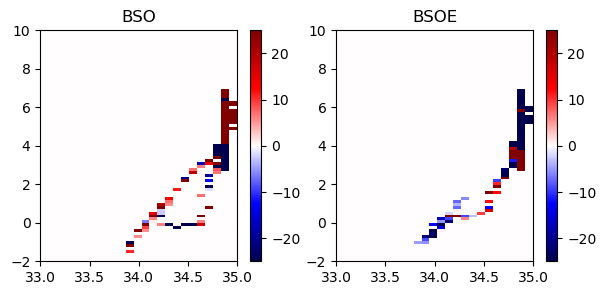

In [45]:
fig = plt.figure(figsize=(7,3))

ax = plt.subplot(121)
cb=ax.pcolormesh(Sbin,Tbin,J_gates[0],cmap='seismic',vmin=-25,vmax=25)
ax.set_title("BSO")
ax.set_xlim(33,35)
ax.set_ylim(-2,10)
plt.colorbar(cb)

ax = plt.subplot(122)
cb=ax.pcolormesh(Sbin,Tbin,J_gates[1],cmap='seismic',vmin=-25,vmax=25)
ax.set_title("BSOE")
ax.set_xlim(33,35)
ax.set_ylim(-2,10)
plt.colorbar(cb)


(-2.0, 10.0)

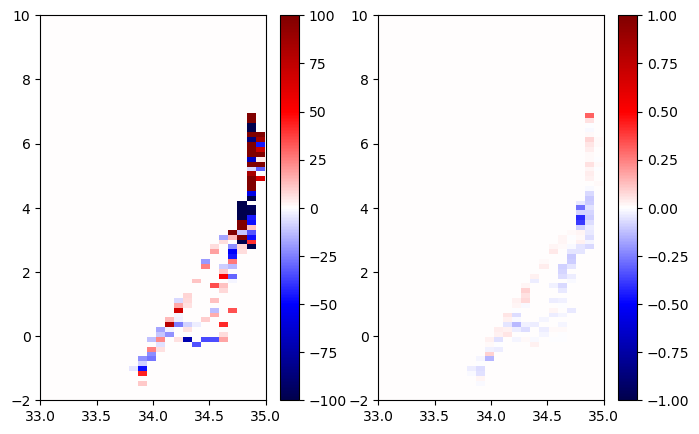

In [43]:
fig = plt.figure(figsize = (8,5,))

ax = plt.subplot(121)
cb = ax.pcolormesh(Sbin,Tbin,np.nansum(J_gates,axis=0),cmap='seismic',vmin=-1e2,vmax=1e2)
plt.colorbar(cb)
ax.set_xlim(33,35)
ax.set_ylim(-2,10)

ax = plt.subplot(122)
cb = ax.pcolormesh(Sbin,Tbin,JtermsS[1],cmap='seismic',vmin=-1,vmax=1)
plt.colorbar(cb)
ax.set_xlim(33,35)
ax.set_ylim(-2,10)

In [44]:
print(np.nansum(J_gates))
print(np.nansum(JtermsS[1]))

6377.545197535196
-2.5030289396004015


## this still did not work. what if we try a very simple mask which is just on one face

(1.0, 120.0)

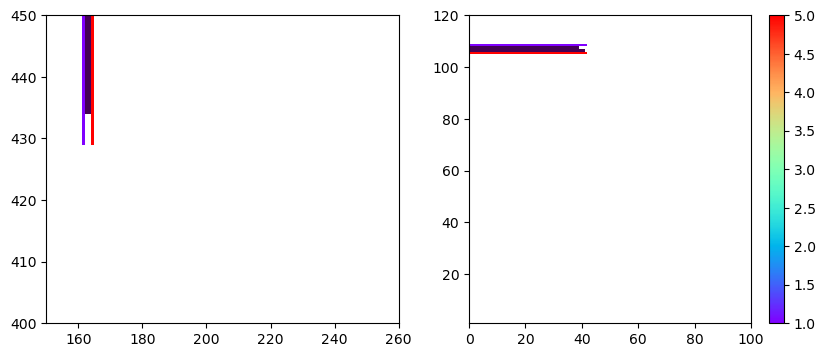

In [107]:
a = get_aste_faces(mymsk,nfx,nfy)
b = get_aste_faces(gates,nfx,nfy)

fig = plt.figure()

ax = plt.subplot(121)
ax.pcolormesh(a.f1[0])
ax.pcolormesh(b.f1[0],cmap='rainbow')
ax.set_xlim(150, 260)
ax.set_ylim(400, 450)

ax = plt.subplot(122)
ax.pcolormesh(a.f3[0])
cb = ax.pcolormesh(b.f3[0], cmap='rainbow')
plt.colorbar(cb)
ax.set_xlim(0, 100)
ax.set_ylim(1, 120)

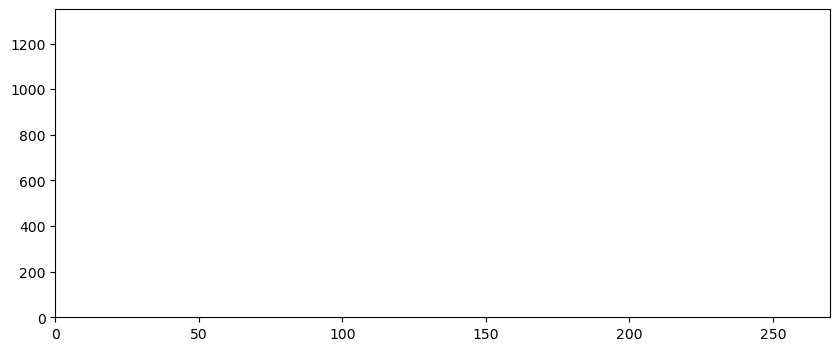

In [110]:
mymsk[:,150:] = np.nan 
plt.pcolormesh(mymsk)